# Machine Learning Project 3

In [44]:
cd ~/Desktop/ML_project2/Tools

/Users/BotezatuCristian/Desktop/ML_project2/Tools


In [45]:
# exercise 6.1.2
from sklearn import preprocessing
from sklearn import utils
from matplotlib.pyplot import figure, plot, xlabel, ylabel, legend, show, boxplot
from sklearn import model_selection, tree
import numpy as np
from toolbox_02450 import clusterplot
from sklearn.cluster import k_means

In [42]:
cd ~/Desktop/ML_project2

/Users/BotezatuCristian/Desktop/ML_project2


In [43]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import pandas as pd
import numpy as np
df = pd.read_excel('DataSet.xlsx')
df = df[(df.temp<=1) & (df.temp>0) & (df.atemp<=1) & (df.atemp>=0) & (df.hum<=1) & (df.hum>=0) & (df.windspeed <=1)]

# Clustering

In [18]:
cd ~/Desktop/ML_project2/Tools

/Users/BotezatuCristian/Desktop/ML_project2/Tools


In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import pandas as pd
import numpy as np
sub_df = df[['hum', 'temp', 'windspeed', 'mnth', 'new', 'weathersit', 'atemp', 'total']]

X = sub_df.as_matrix()
std = np.std(X, axis=0)
std = np.expand_dims(std,axis=0)

X = X/std
# Subtract mean value from data
X = X - np.ones((len(X),1))*X.mean(0)

mat_data = X

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


# Creating X

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[ 1.16083891, -0.43143186, -0.36756545, -1.59437377, -0.73678528],
       [ 0.59664478, -0.34292854,  0.38172799, -1.59437377, -1.02593121],
       [-0.73389426, -1.10882071,  0.37977167, -1.59437377, -1.04183424],
       ...,
       [ 1.2508048 , -0.89355933,  0.96017575,  1.59971148, -1.20231023],
       [ 0.37471177, -0.84390655,  1.245857  ,  1.59971148, -0.85822657],
       [-2.77124023, -0.84772881, -0.40988135,  1.59971148, -0.28427191]])

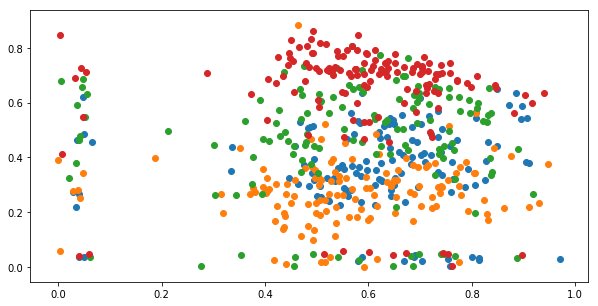

In [8]:
y = df[['season']].as_matrix().ravel()
attributeNames = [name for name in list(sub_df)]

plt.scatter(sub_df[y ==4].hum, sub_df[y ==4].temp)
plt.scatter(sub_df[y ==1].hum, sub_df[y ==1].temp)
plt.scatter(sub_df[y ==2].hum, sub_df[y ==2].temp)
plt.scatter(sub_df[y ==3].hum, sub_df[y ==3].temp)
X[:,:5]

Text(0.5,1,'Projection of the centred data on the PC space')

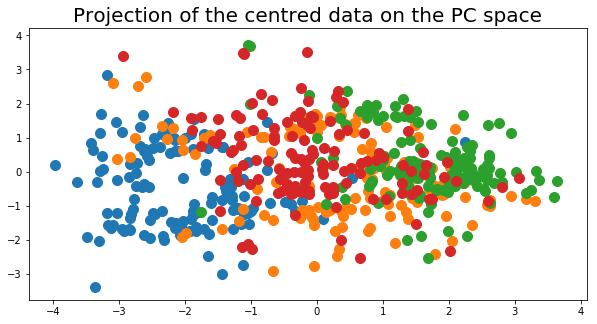

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
from scipy.linalg import svd
import numpy as np
from datetime import date
N = len(sub_df.columns)

std = np.std(X, axis=0)
std = np.expand_dims(std,axis=0)

X = X/std
# Subtract mean value from data

Y = X - np.ones((N))*X.mean(axis=0)

# PCA by computing SVD of Y
U,S,V = svd(Y,full_matrices=False)
V = V.T

Z = Y @ V[:,:5]


data = pd.DataFrame({'PCA-1':Z[:,0],'PCA-2':Z[:,1]})  

ax = plt.scatter(x="PCA-1", y="PCA-2",
                      s=100, 
                     data=data[y==1])
ax = plt.scatter(x="PCA-1", y="PCA-2",
                      s=100, 
                     data=data[y==2])
ax = plt.scatter(x="PCA-1", y="PCA-2",
                      s=100, 
                     data=data[y==3])
ax = plt.scatter(x="PCA-1", y="PCA-2",
                      s=100, 
                     data=data[y==4])
plt.title('Projection of the centred data on the PC space', fontsize = 20)

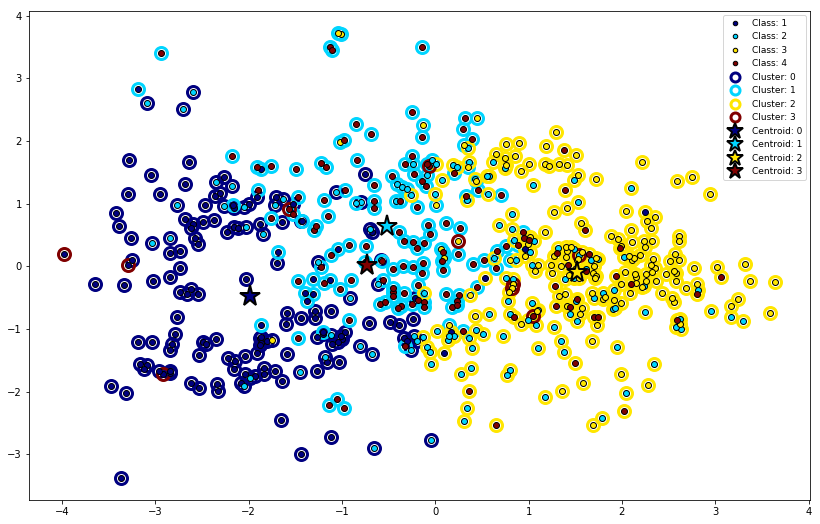

Ran Exercise 10.1.1


In [12]:
# Number of clusters:
K = 4

# K-means clustering:
centroids, cls, inertia = k_means(Z,K)
    
# Plot results:
figure(figsize=(14,9))
clusterplot(Z, cls, centroids, y)
show()

print('Ran Exercise 10.1.1')

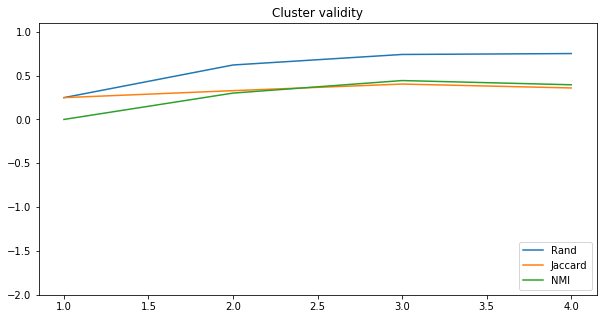

Ran Exercise 10.1.3


In [13]:
from matplotlib.pyplot import figure, title, plot, ylim, legend, show
import numpy as np
from scipy.io import loadmat
from toolbox_02450 import clusterval
from sklearn.cluster import k_means
# Maximum number of clusters:
K = 4

# Allocate variables:
Rand = np.zeros((K,))
Jaccard = np.zeros((K,))
NMI = np.zeros((K,))

for k in range(K):
    # run K-means clustering:
    #cls = Pycluster.kcluster(X,k+1)[0]
    centroids, cls, inertia = k_means(Z,k+1)
    # compute cluster validities:
    Rand[k], Jaccard[k], NMI[k] = clusterval(y,cls)    
        
# Plot results:

figure(1)
title('Cluster validity')
plot(np.arange(K)+1, Rand)
plot(np.arange(K)+1, Jaccard)
plot(np.arange(K)+1, NMI)
ylim(-2,1.1)
legend(['Rand', 'Jaccard', 'NMI'], loc=4)
show()

print('Ran Exercise 10.1.3')

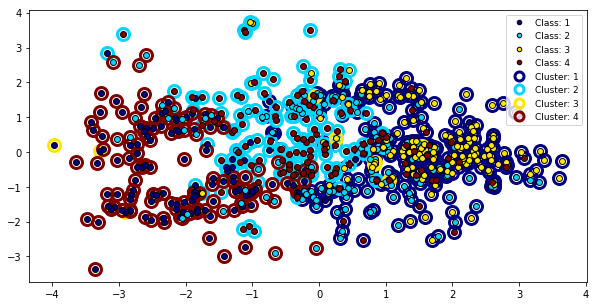

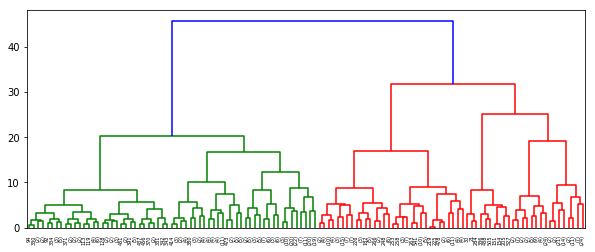

Ran Exercise 10.2.1


In [14]:
from matplotlib.pyplot import figure, show
from scipy.io import loadmat
from toolbox_02450 import clusterplot
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
# Perform hierarchical/agglomerative clustering on data matrix
#Method = 'single'
Method = 'ward'
Metric = 'euclidean'

ZZ = linkage(Z, method=Method, metric=Metric)

# Compute and display clusters by thresholding the dendrogram
Maxclust = 4
cls = fcluster(ZZ, criterion='maxclust', t=Maxclust)
figure(1)
clusterplot(Z, cls.reshape(cls.shape[0],1), y=y)

# Display dendrogram
max_display_levels=6
figure(2,figsize=(10,4))
dendrogram(ZZ, truncate_mode='level', p=max_display_levels)

show()

print('Ran Exercise 10.2.1')

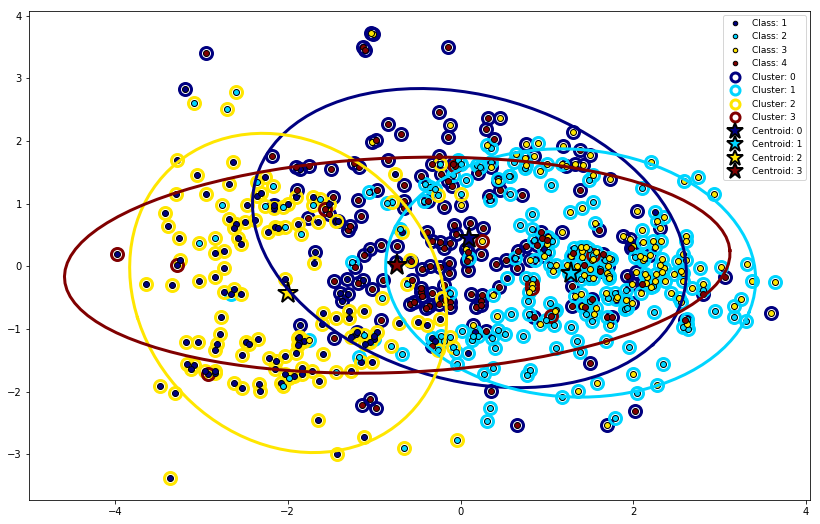

Ran Exercise 11.1.1


In [20]:
from matplotlib.pyplot import figure, show, savefig
import numpy as np
from scipy.io import loadmat
from toolbox_02450 import clusterplot
from sklearn.mixture import GaussianMixture

attributeNames = [name for name in sub_df.columns]
X = Z
#X_old = X
#X = np.hstack([X,X])
N, M = X.shape
C = 4
# Number of clusters
K = 4
cov_type = 'full'       
# type of covariance, you can try out 'diag' as well
reps = 1                
# number of fits with different initalizations, best result will be kept
# Fit Gaussian mixture model
gmm = GaussianMixture(n_components=K, covariance_type=cov_type, n_init=reps, 
                      tol=1e-6).fit(X)
cls = gmm.predict(X)    
# extract cluster labels
cds = gmm.means_        
# extract cluster centroids (means of gaussians)
covs = gmm.covariances_
# extract cluster shapes (covariances of gaussians)
if cov_type.lower() == 'diag':
    new_covs = np.zeros([K,M,M])    
    
    count = 0    
    for elem in covs:
        temp_m = np.zeros([M,M])
        new_covs[count] = np.diag(elem)
        count += 1

    covs = new_covs

# Plot results:
# figure(figsize=(14,9))
# clusterplot(X, clusterid=cls, centroids=cds, y=y, covars=covs)
# show()

## In case the number of features != 2, then a subset of features most be plotted instead.
figure(figsize=(14,9))
idx = [0,1] # feature index, choose two features to use as x and y axis in the plot
clusterplot(X[:,idx], clusterid=cls, centroids=cds[:,idx], y=y, covars=covs[:,idx,:][:,:,idx])

savefig('Clustering1_GMM.png')
show()


print('Ran Exercise 11.1.1')

Fitting model for K=1
Fitting model for K=2
Fitting model for K=3
Fitting model for K=4
Fitting model for K=5
Fitting model for K=6
Fitting model for K=7
Fitting model for K=8
Fitting model for K=9
Fitting model for K=10


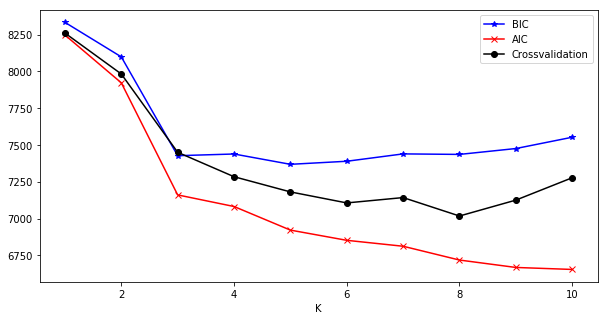

Ran Exercise 11.1.5


In [21]:
from matplotlib.pyplot import figure, plot, legend, xlabel, show
import numpy as np
from scipy.io import loadmat
from sklearn.mixture import GaussianMixture
from sklearn import model_selection
C = 7
X = Z

# Range of K's to try
KRange = range(1,11)
T = len(KRange)

covar_type = 'full'     # you can try out 'diag' as well
reps = 3                # number of fits with different initalizations, best result will be kept

# Allocate variables
BIC = np.zeros((T,))
AIC = np.zeros((T,))
CVE = np.zeros((T,))

# K-fold crossvalidation
CV = model_selection.KFold(n_splits=10,shuffle=True)

for t,K in enumerate(KRange):
        print('Fitting model for K={0}'.format(K))

        # Fit Gaussian mixture model
        gmm = GaussianMixture(n_components=K, covariance_type=covar_type, n_init=reps).fit(X)

        # Get BIC and AIC
        BIC[t,] = gmm.bic(X)
        AIC[t,] = gmm.aic(X)

        # For each crossvalidation fold
        for train_index, test_index in CV.split(X):

            # extract training and test set for current CV fold
            X_train = X[train_index]
            X_test = X[test_index]

            # Fit Gaussian mixture model to X_train
            gmm = GaussianMixture(n_components=K, covariance_type=covar_type, n_init=reps).fit(X_train)

            # compute negative log likelihood of X_test
            CVE[t] += -gmm.score_samples(X_test).sum()
            

# Plot results

figure(1); 
plot(KRange, BIC,'-*b')
plot(KRange, AIC,'-xr')
plot(KRange, 2*CVE,'-ok')
legend(['BIC', 'AIC', 'Crossvalidation'])
xlabel('K')
show()

print('Ran Exercise 11.1.5')

# Outlier detection/Anomaly detection

In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import numpy as np
from scipy.stats.kde import gaussian_kde
from sklearn.neighbors import NearestNeighbors
import math

In [25]:
sub_df = df[['Date','hum', 'temp', 'windspeed', 'mnth', 'new', 'weathersit', 'atemp', 'total']]

# Creating X

In [26]:
dateNames = list(sub_df['Date'])
l = list(sub_df.columns)
attributesToShow = l[2:-1]
X = sub_df.as_matrix(columns = attributesToShow)
N = len(sub_df)
X.shape

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


(544, 6)

# Gaussian Kernel density

In [27]:
# Compute kernel density estimate
X = Z
kde = gaussian_kde(X.T)

The index of the lowest density object: 527


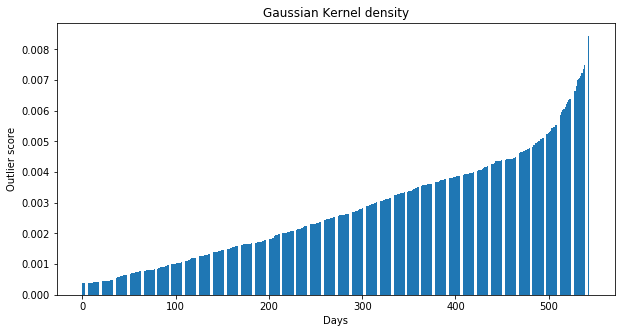

In [28]:
scores = kde.evaluate(X.T)
idx = scores.argsort()
scores.sort()

print('The index of the lowest density object: {0}'.format(idx[0]))

f = figure()
plt.bar(range(len(X)),scores)
xlabel('Days')
ylabel('Outlier score')
title('Gaussian Kernel density')
show()
f.savefig('OutlierVsDaysGaussian.png')

In [29]:
g = df.columns.to_series().groupby(df.dtypes).groups
rankableColumns = {k.name: v for k, v in g.items()}['float64']
rankColumns = []
for c in rankableColumns:
    cR = c + '_rank'
    rankColumns.append(cR)
    sub_df[cR] = sub_df[c].rank(ascending = False)
    sub_df[cR] = sub_df[cR].astype(int)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
outlierSeason = set()

for i in idx[:5]:
    print(dateNames[i])
    outlierSeason.add(dateNames[i])

2012-12-07 00:00:00
2012-03-23 00:00:00
2011-09-26 00:00:00
2011-02-06 00:00:00
2011-11-16 00:00:00


# KNN density

In [31]:
# Number of neighbors
K = 5

# Find the k nearest neighbors
knn = NearestNeighbors(n_neighbors=K).fit(X)

In [32]:
D, i = knn.kneighbors(X)

In [33]:
# Compute the density
#D, i = knclassifier.kneighbors(np.matrix(xe).T)
knn_density = 1./(D.sum(axis=1)/K)
# Compute the average relative density
DX, iX = knn.kneighbors(X)
knn_densityX = 1./(DX[:,1:].sum(axis=1)/K)
knn_avg_rel_density = knn_density/(knn_densityX[i[:,1:]].sum(axis=1)/K)
scores = knn_densityX

The index of the lowest density object: 30


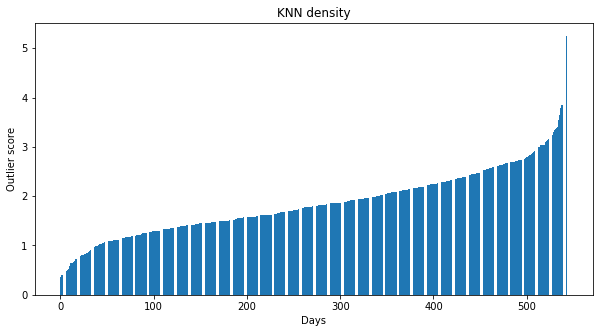

In [34]:
idx = scores.argsort()
scores.sort()

print('The index of the lowest density object: {0}'.format(idx[0]))

# Plot kernel density estimate
f = figure()
plt.bar(range(544),scores[:544])
xlabel('Days')
ylabel('Outlier score')
title('KNN density')
show()
f.savefig('OutlierVsDaysKNN.png')

In [35]:
for i in idx[:5]:
    print(dateNames[i])
    outlierSeason.add(dateNames[i])

2011-02-06 00:00:00
2012-12-07 00:00:00
2012-03-23 00:00:00
2011-01-28 00:00:00
2011-07-22 00:00:00


# KNN average relative density

In [36]:
knn_avg_rel_density = knn_density/(knn_densityX[iX[:,1:]].sum(axis=1)/K)
scores = knn_avg_rel_density

The index of the lowest density object: 505


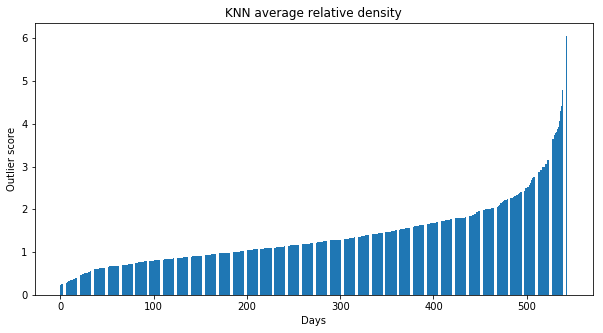

In [37]:
idx = scores.argsort()
scores.sort()

print('The index of the lowest density object: {0}'.format(idx[0]))

# Plot kernel density estimate
f = figure()
plt.bar(range(544),scores[:])
xlabel('Days')
ylabel('Outlier score')
title('KNN average relative density')
show()
f.savefig('OutlierVsDaysKNNAverage.png')

In [38]:
for i in idx[:5]:
    print(dateNames[i])
    outlierSeason.add(dateNames[i])

2012-11-11 00:00:00
2012-03-23 00:00:00
2011-02-06 00:00:00
2012-12-07 00:00:00
2012-12-26 00:00:00


In [39]:
sub_df[sub_df['Date'].isin(outlierSeason)][ ['Date'] + rankColumns]

,Date,temp_rank,atemp_rank,hum_rank,windspeed_rank
27,2011-01-28,471,516,57,6
36,2011-02-06,409,453,312,1
202,2011-07-22,4,1,296,2
268,2011-09-26,120,166,23,8
319,2011-11-16,255,292,511,408
447,2012-03-23,154,187,160,7
680,2012-11-11,282,317,198,5
706,2012-12-07,371,421,75,3
725,2012-12-26,448,517,39,48
